In [ ]:
pip install scikit-learn

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.cluster.vq import vq
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread_collection 
import random

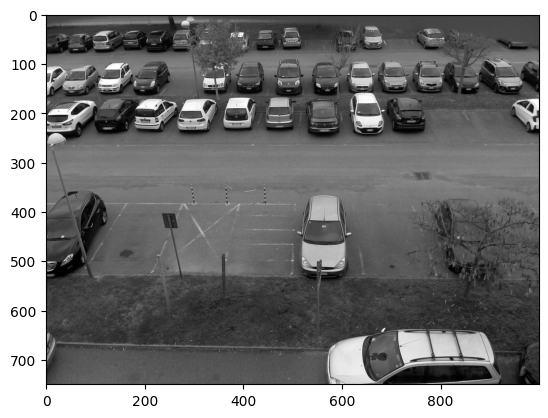

In [2]:
img_rgb = cv.imread(r"C:\Users\elisa\OneDrive\Desktop\FINAL PROJECT\2015-11-20_1347.jpg")
img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

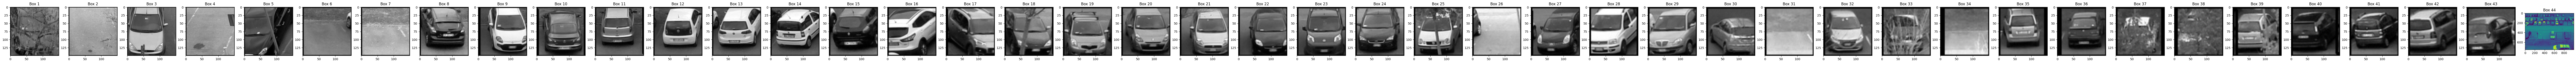

In [9]:
camera_path = "C:\\Users\\elisa\\OneDrive\\Desktop\\FINAL PROJECT\\camera6.csv"
df = pd.read_csv(camera_path, sep = ";")
slots = []
color = (0, 255, 0) 
fig, axes = plt.subplots(nrows=1, ncols=df.shape[0], figsize=(150, 150))
thickness = 2
x = df['X'][0]

for i, ax in enumerate(axes):
    x = int((df['X'][i])/2.592)
    w = int((df['X'][i] + df['W'][i])/2.592)
    y = int((df['Y'][i])/2.592)
    h = int((df['Y'][i] + df['H'][i])/2.592)
    bbox = img[y:h, x:w] 
    bbox = cv.resize(bbox, (150, 150), interpolation=cv.INTER_LINEAR)
    slots.append(bbox)
    
    ax.imshow(bbox, cmap='gray')
    ax.set_title(f'Box {i + 1}')

    plt.imshow(bbox)
    img_with_bbox = cv.rectangle(img, (x, y), (w, h), color, thickness)


plt.imshow(img_with_bbox)

In [ ]:
imagesB = []
imagesF = []
folder_busy = "C:\\Users\\elisa\\OneDrive\\Desktop\\FINAL PROJECT\\busy"
files_images_B = []
files_images_F = []

for file in os.listdir(folder_busy):
    if file.lower().endswith('.jpg'):
        files_images_B.append(file)
        path_busy = os.path.join(folder_busy, file)
        img_B = cv.imread(path_busy)
        imagesB.append(img_B)

folder_free = "C:\\Users\\elisa\\OneDrive\\Desktop\\FINAL PROJECT\\free"

for file in os.listdir(folder_free):
    if file.lower().endswith('.jpg'):
        files_images_F.append(file)
        path_free = os.path.join(folder_free, file)
        img_F = cv.imread(path_free)
        imagesF.append(img_F)

imagesBF = []
imagesBF = imagesB + imagesF

plt.imshow(imagesF[6], cmap='gray')

In [ ]:
# all images in grayscale

bw_imgs_B = []
bw_imgs_F = []

for img in imagesB:
    if len(img.shape) == 3:
        bw_imgs_B.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

    else:
        bw_imgs_B.append(img)

for img in imagesF:
    if len(img.shape) == 3:
        bw_imgs_F.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

    else:
        bw_imgs_F.append(img)

bw_imgs_BF = []

for img in imagesBF:
    if len(img.shape) == 3:
        bw_imgs_BF.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

    else:
        bw_imgs_BF.append(img)